In [1]:
import os
import sys

import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

import trackintel as ti
from trackintel.geogr.distances import meters_to_decimal_degrees
from trackintel.io.dataset_reader import read_geolife


In [2]:
rawdata_geolife = read_geolife('rawdata_geolife')

start importing geolife user_id:  0
finished user_id:  0
start importing geolife user_id:  1
finished user_id:  1


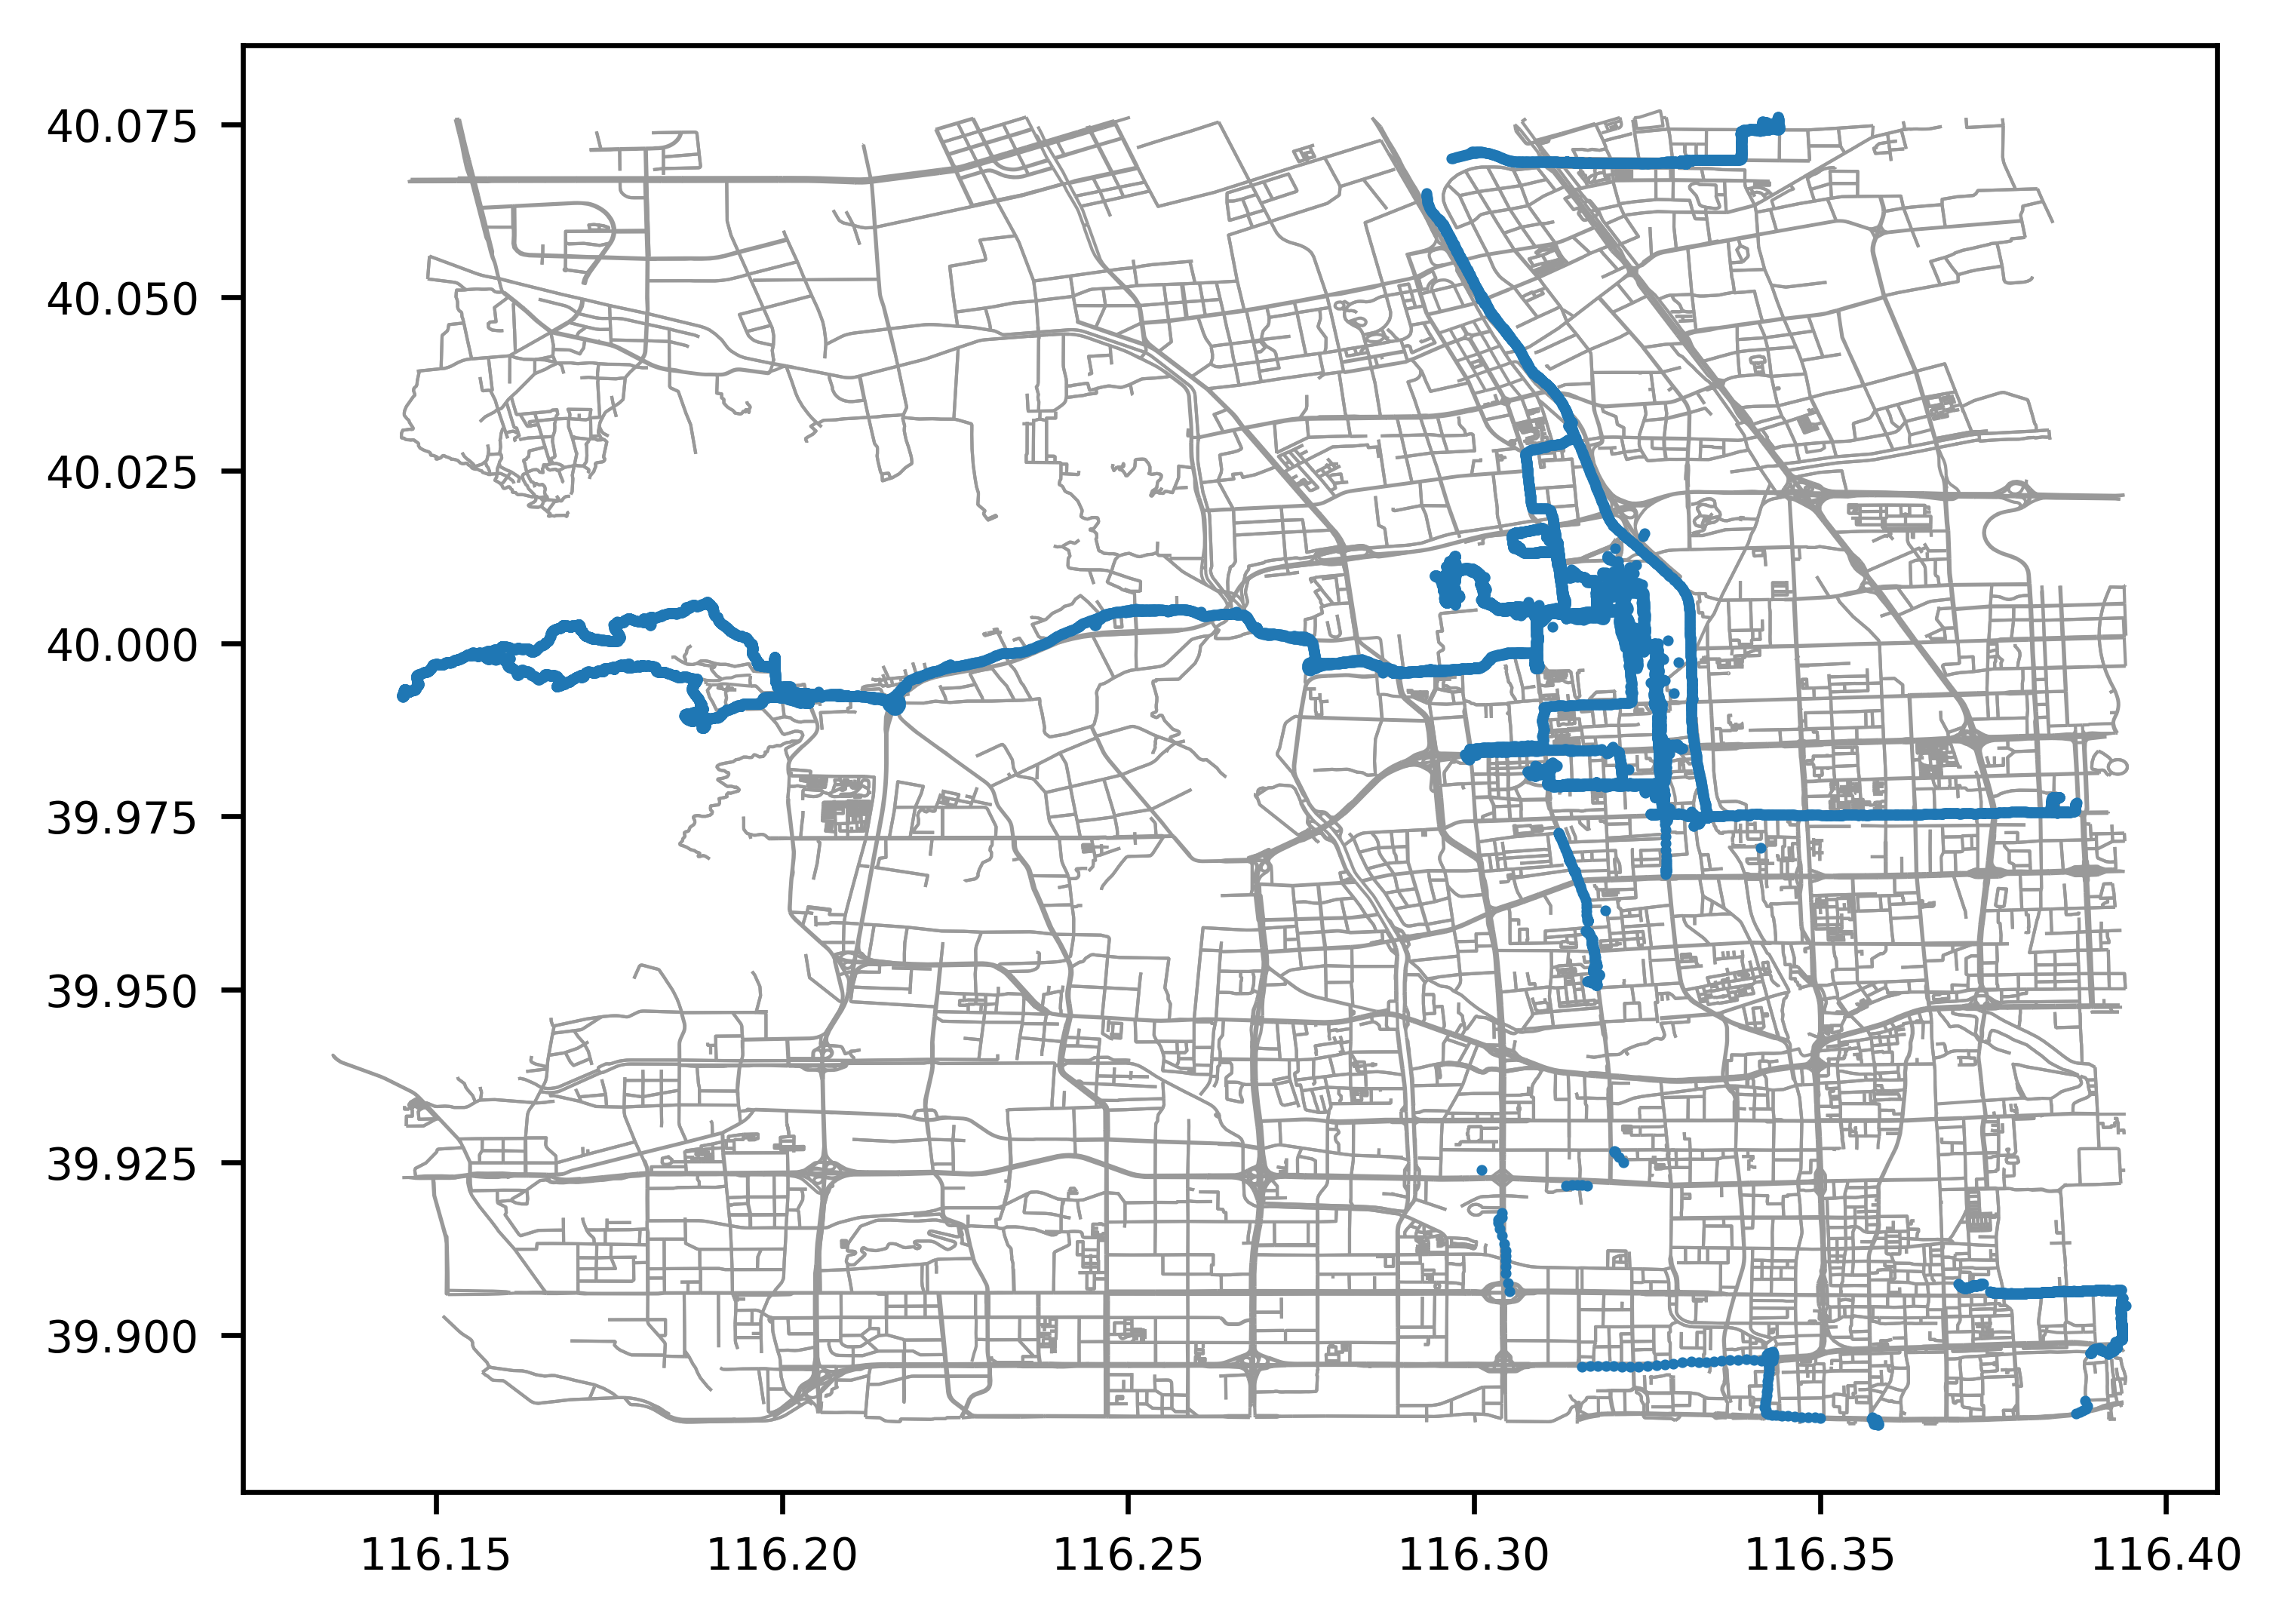

In [3]:
pfs = rawdata_geolife.copy()
pfs.as_positionfixes.plot(plot_osm=True)

(103, 6)


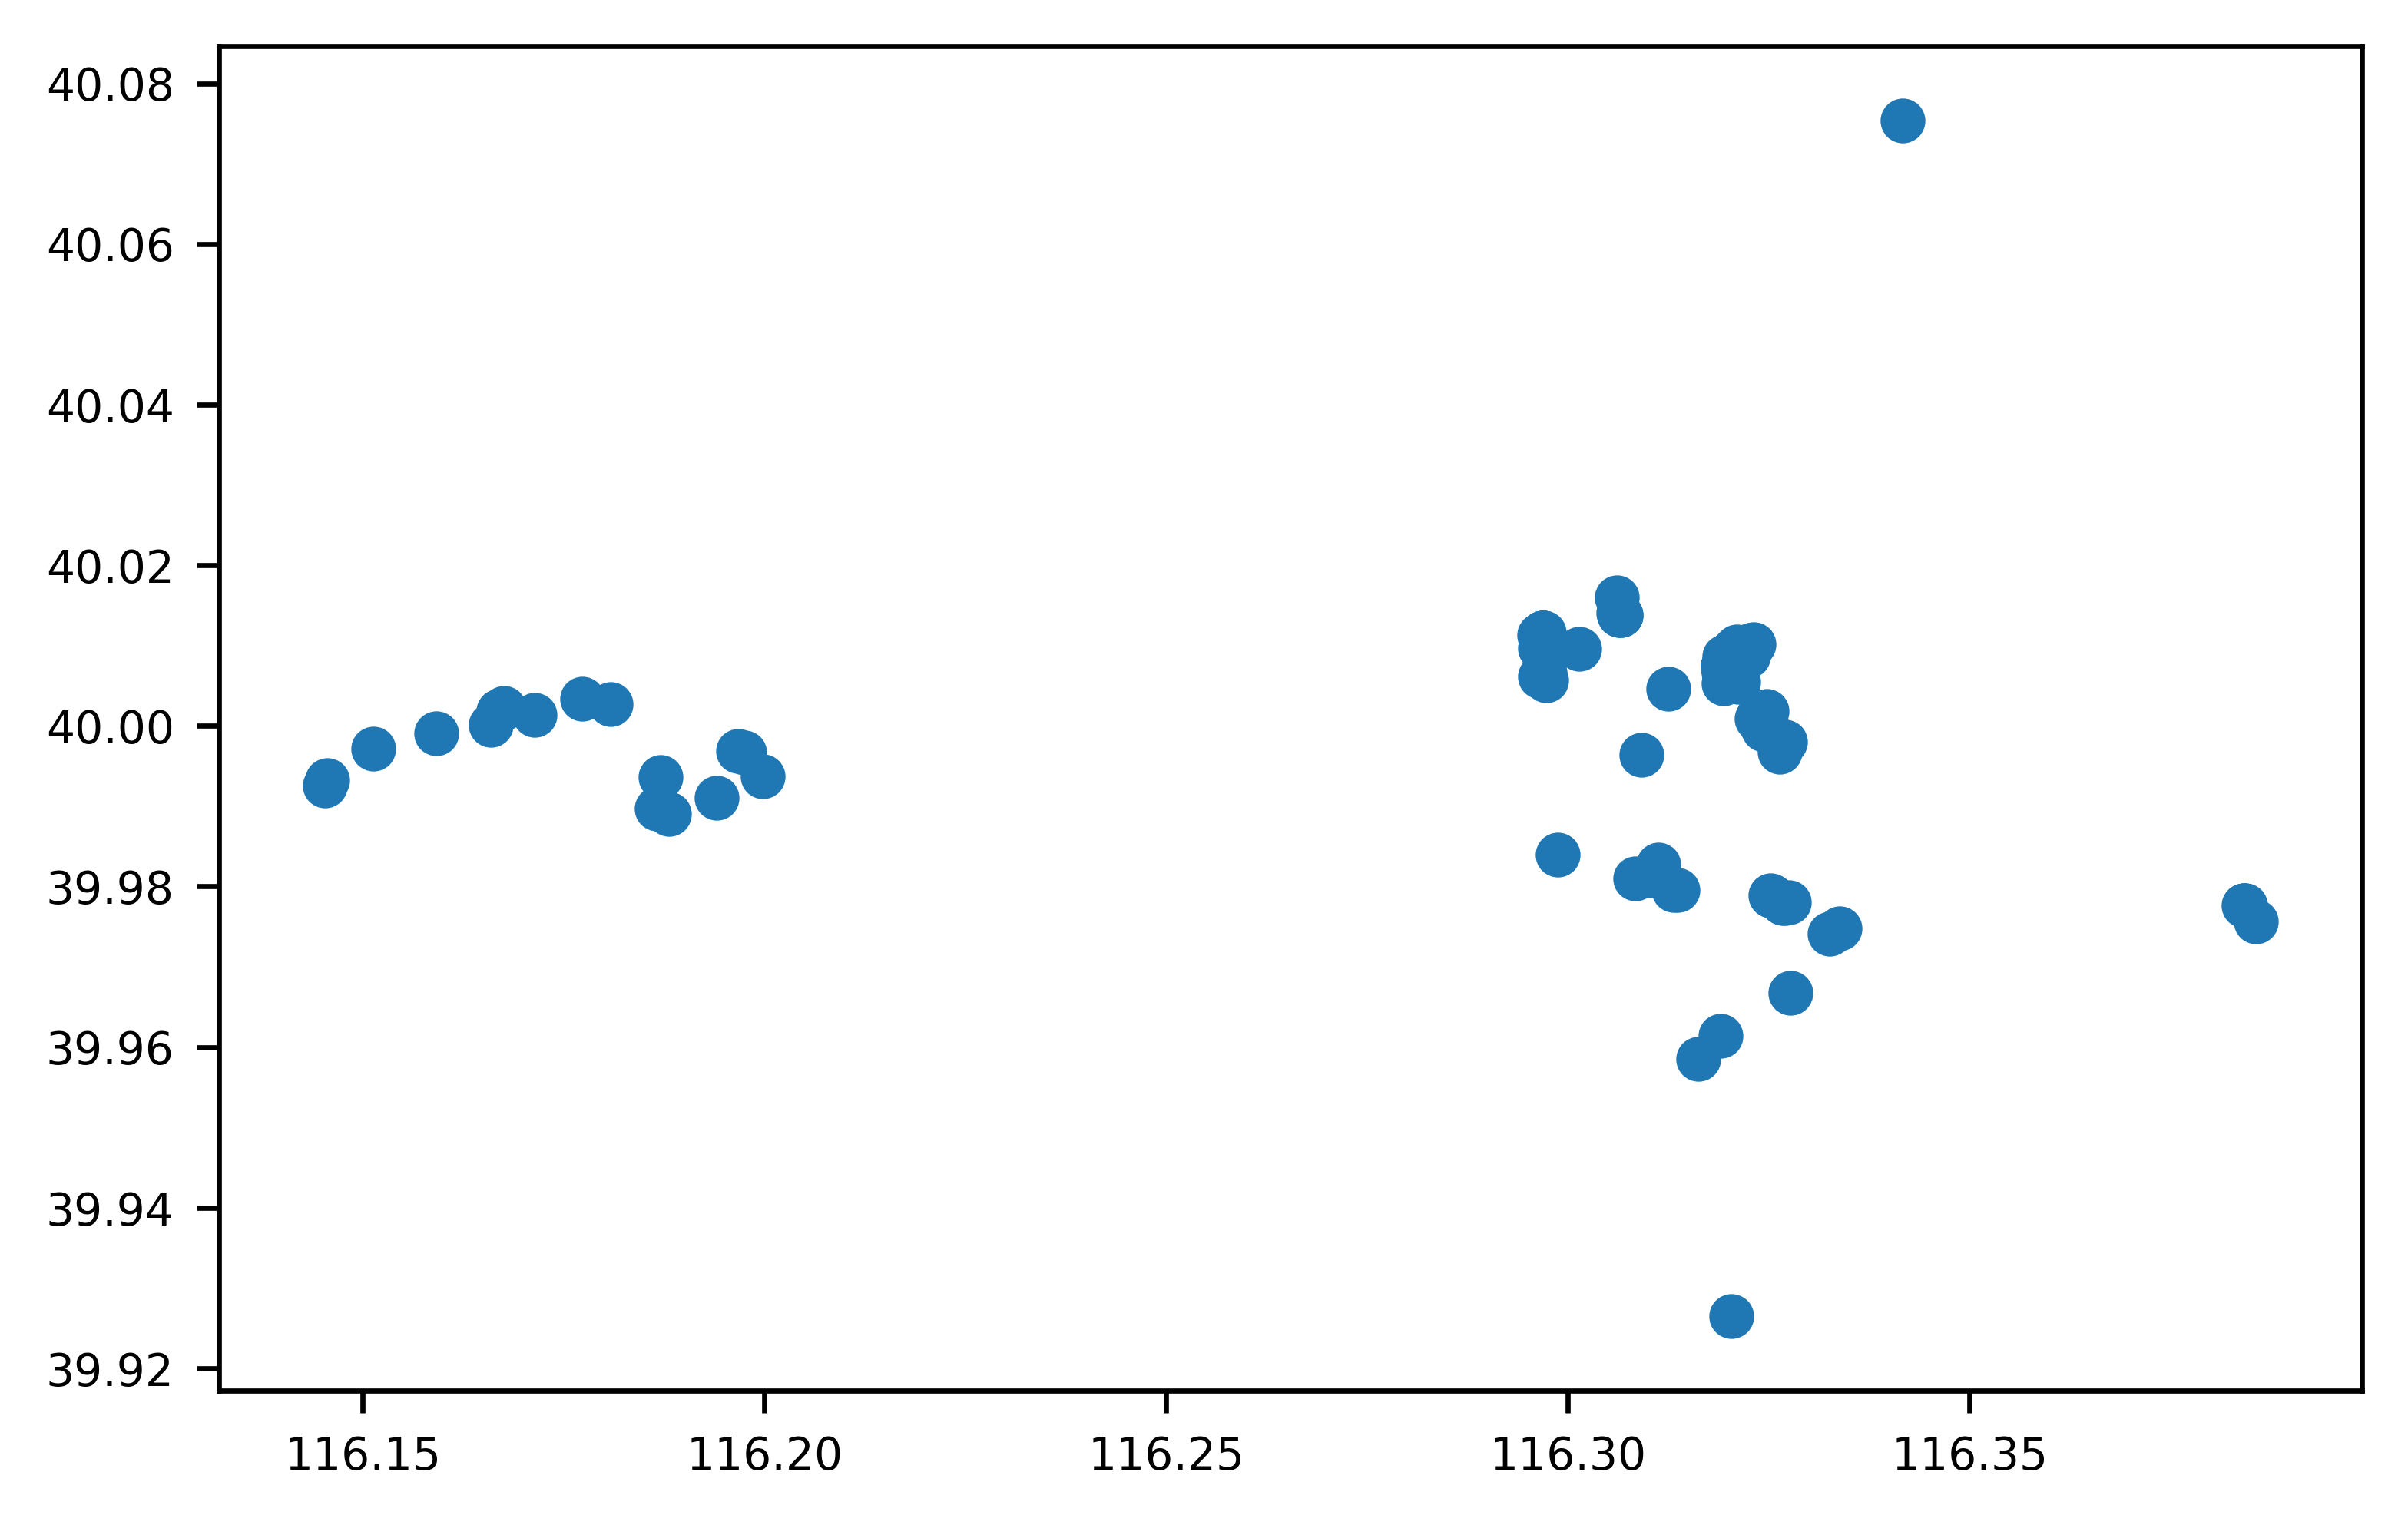

In [4]:
spts = pfs.as_positionfixes.extract_staypoints(method='sliding', dist_threshold=25, time_threshold=5*60)
print(spts.shape)
spts.plot()

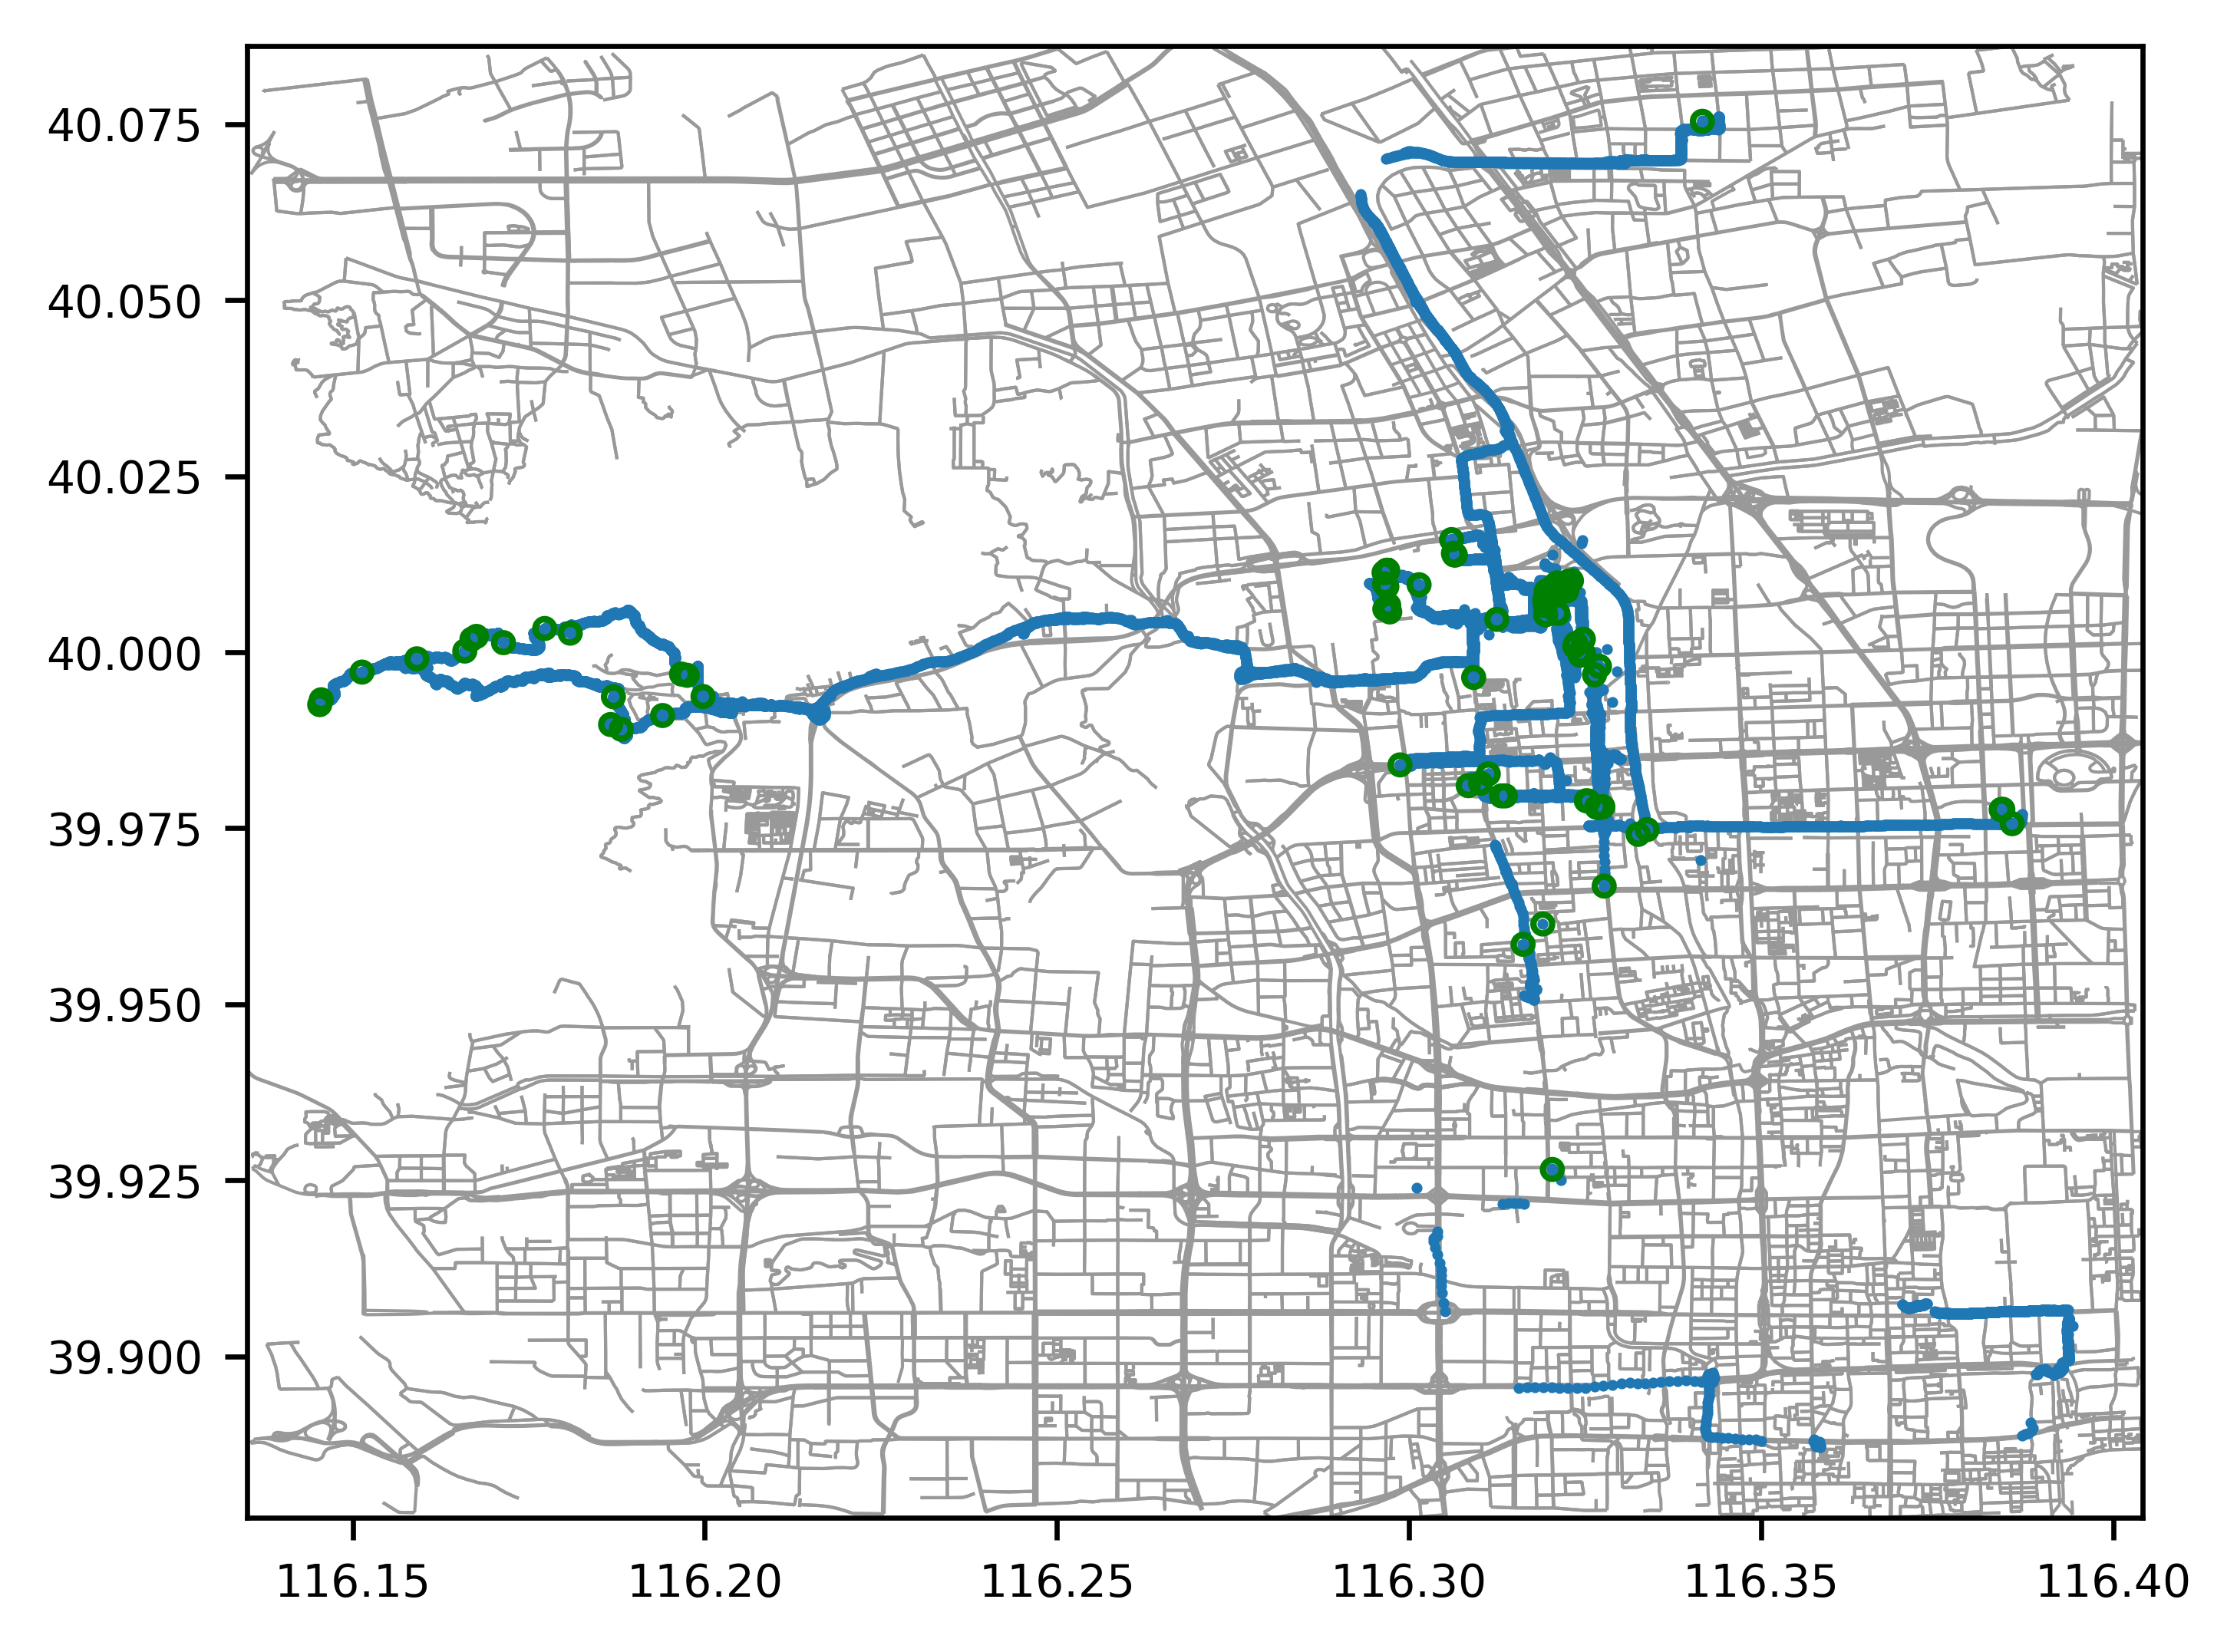

In [5]:
spts.as_staypoints.plot(radius=meters_to_decimal_degrees(100, 47.5), positionfixes=pfs, plot_osm=True)


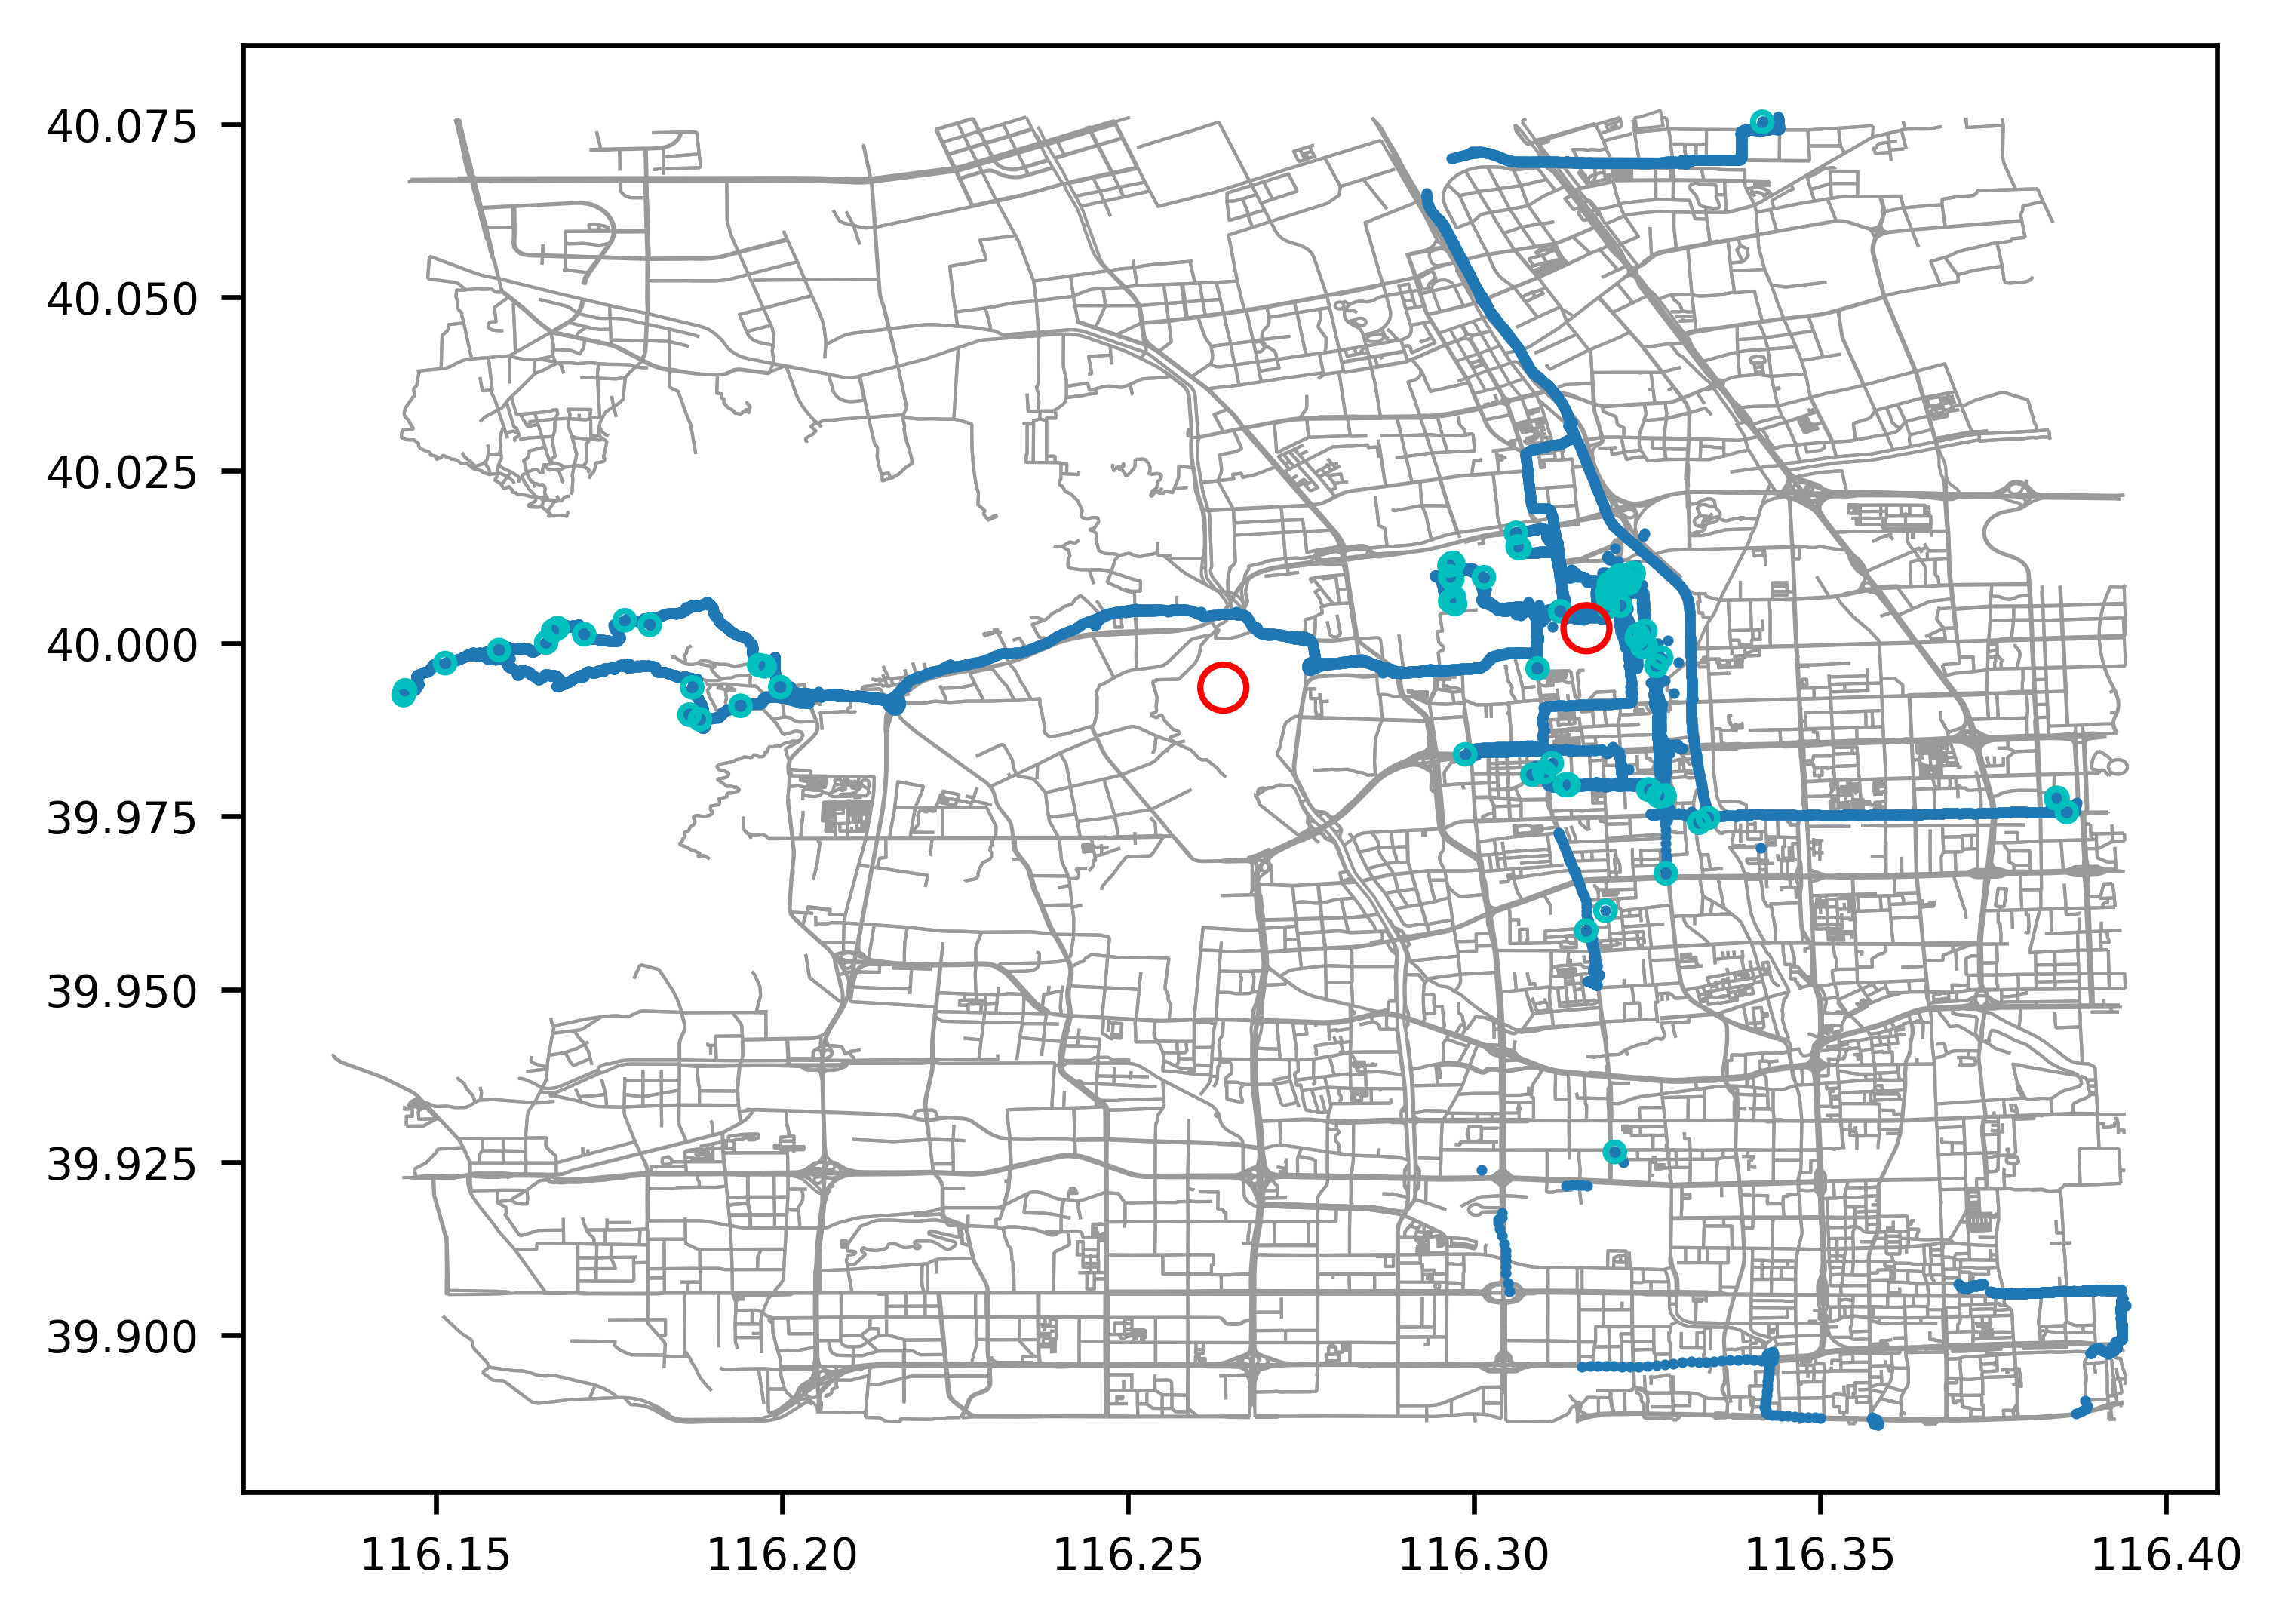

In [6]:
plcs = spts.as_staypoints.extract_places()
plcs.as_places.plot(radius=meters_to_decimal_degrees(250, 47.5), 
                    positionfixes=pfs, staypoints=spts, staypoints_radius=meters_to_decimal_degrees(100, 47.5), 
                    plot_osm=True)

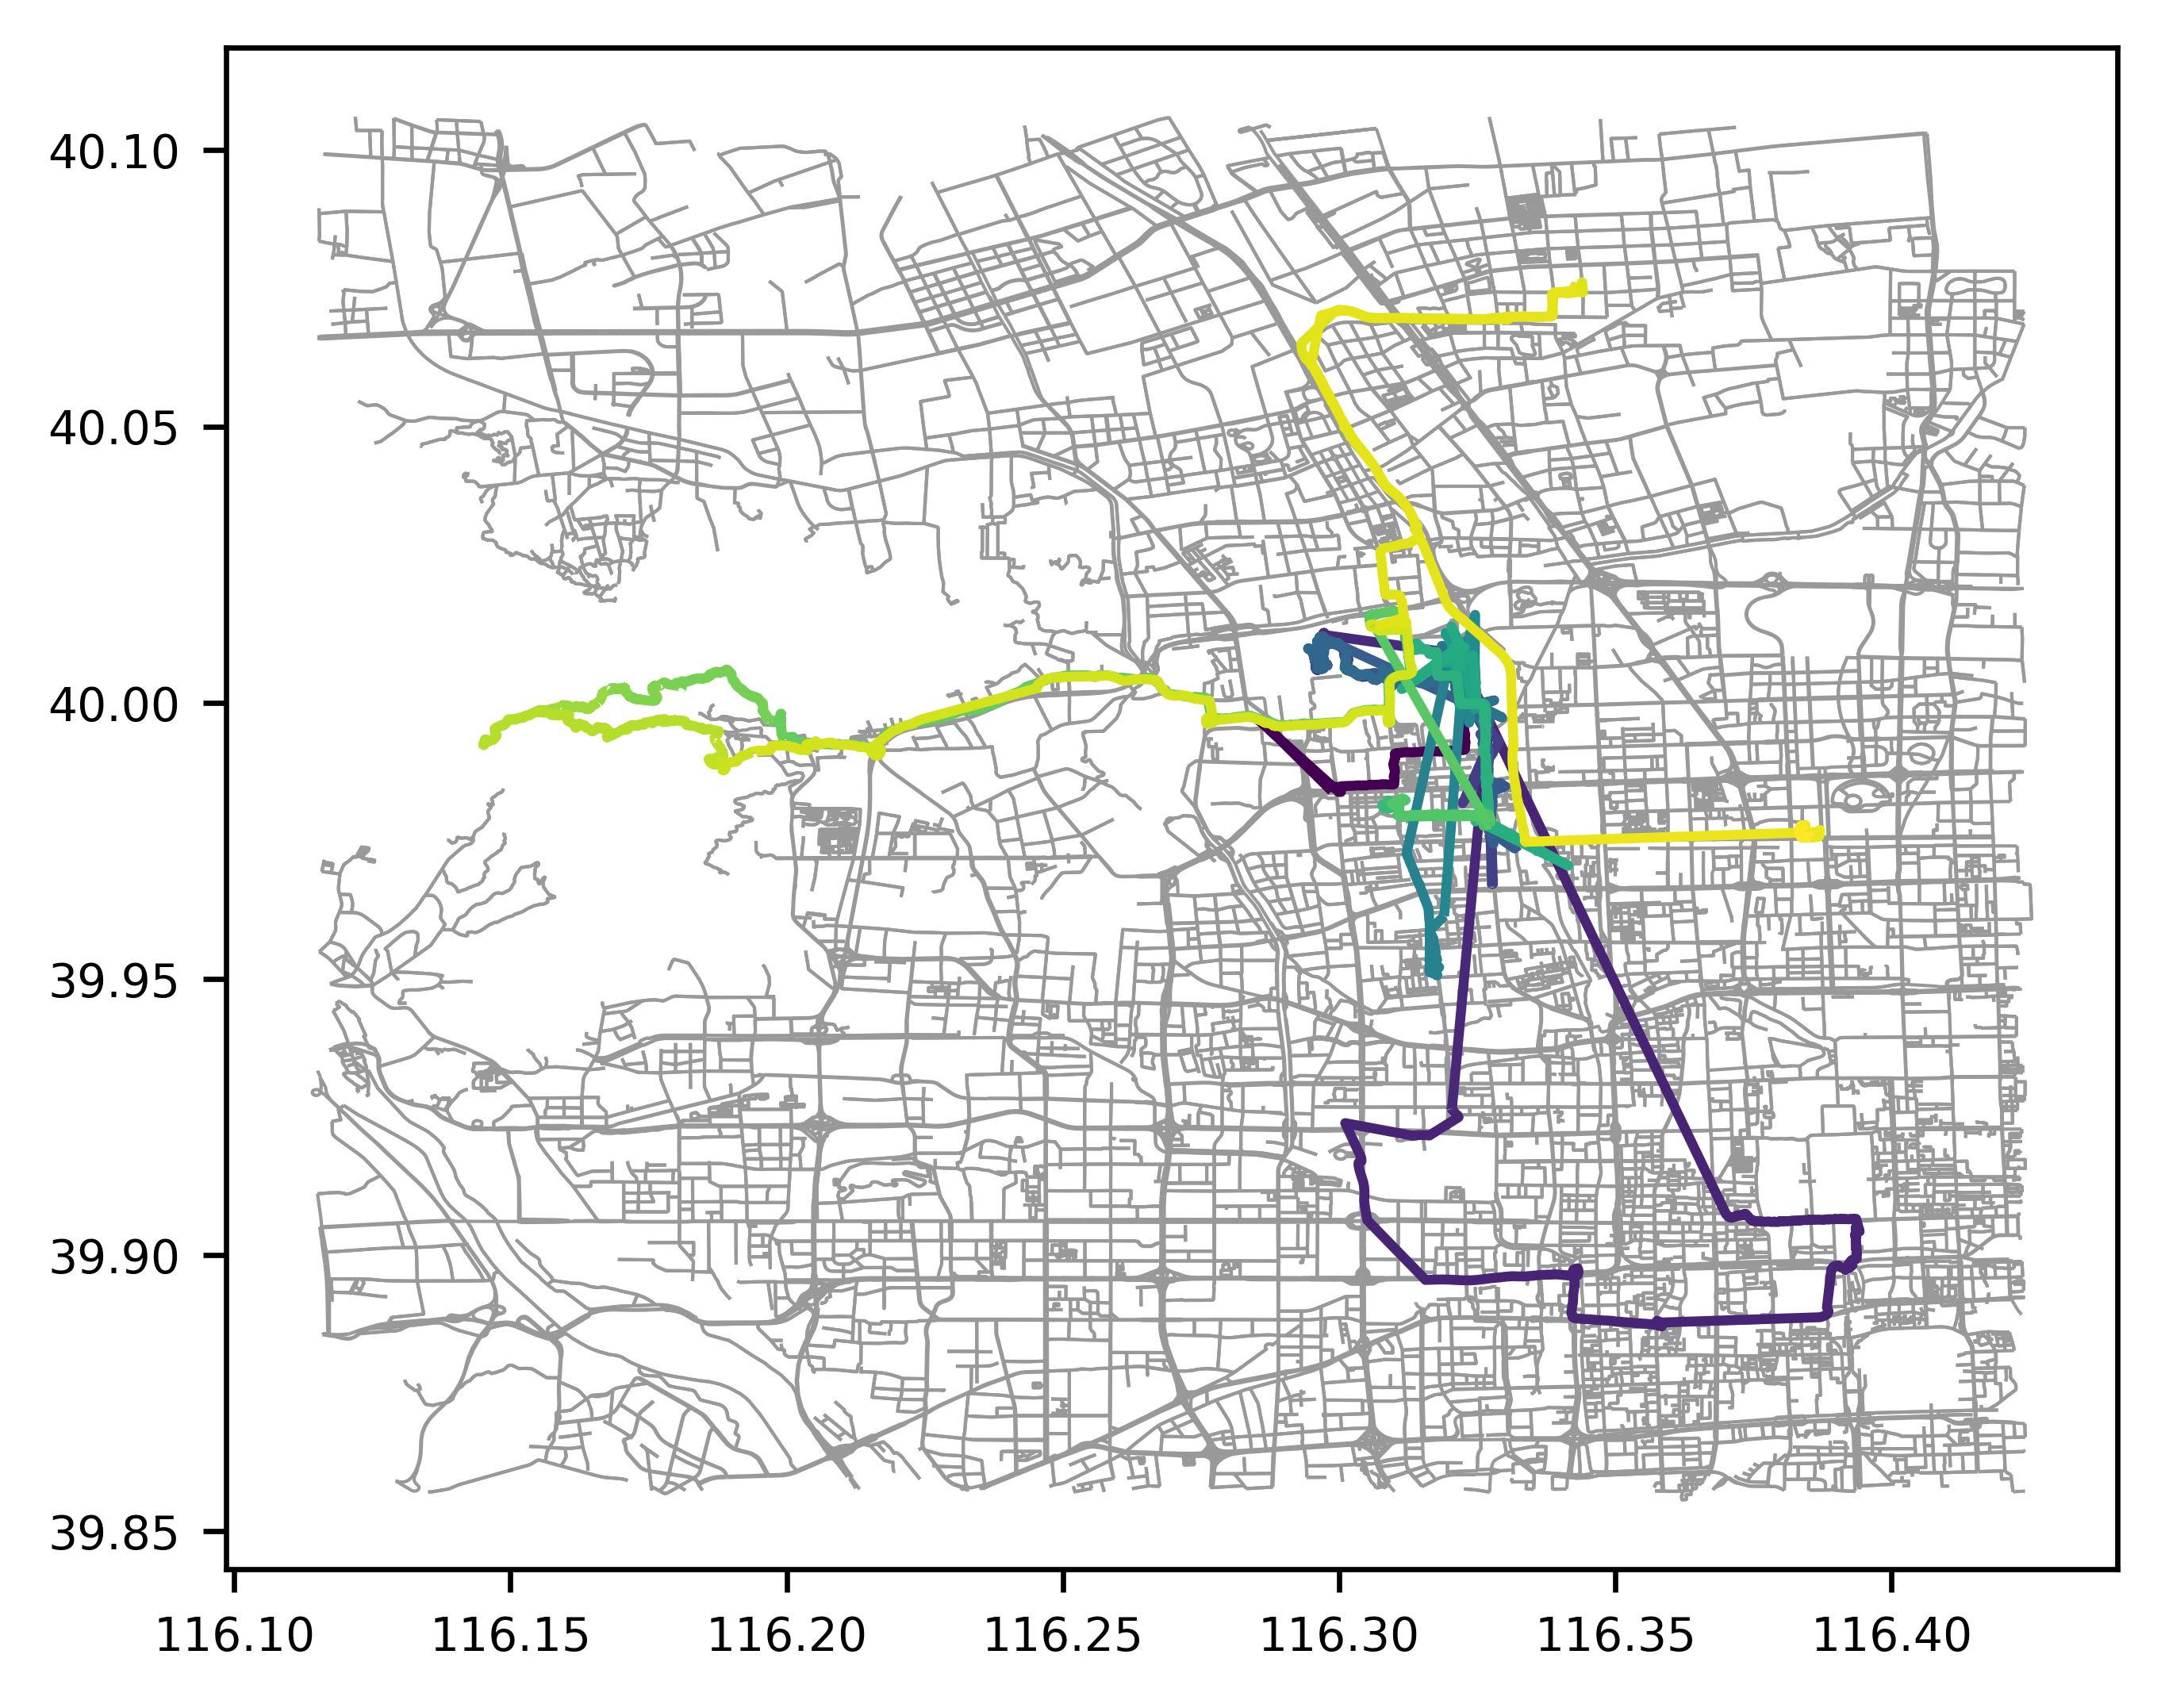

In [7]:
tpls = pfs.as_positionfixes.extract_triplegs(spts)
tpls.as_triplegs.plot(plot_osm=True)

In [8]:
print(os.getcwd())

C:\Users\henry\OneDrive\Programming\trackintel\examples\example_geolife


In [9]:
pfs['tracked_at'] = pfs['tracked_at'].astype(np.int64) // 10**9
spts['started_at'] = spts['started_at'].astype(np.int64) // 10**9
spts['finished_at'] = spts['finished_at'].astype(np.int64) // 10**9
tpls['started_at'] = tpls['started_at'].astype(np.int64) // 10**9
tpls['finished_at'] = tpls['finished_at'].astype(np.int64) // 10**9

if not os.path.exists(os.path.join('..', 'out', 'shp')):
    os.mkdir(os.path.join('..', 'out', 'shp'))

    
pfs.to_file(os.path.join('..', 'out', 'shp', 'geolife_positionfixes.shp'))
spts.to_file(os.path.join('..', 'out', 'shp', 'geolife_staypoints.shp'))
tpls.to_file(os.path.join('..', 'out', 'shp', 'geolife_triplegs.shp'))
